# Project 1: Recreate - Remix


## Part 1: Recreating Figure 
- Comparison of SDEs in comparison to other roles. 
- In 2022, Software developers earned an average of $141,138, $76,455 more than the average national salary of $64,683


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [4]:
file = "Yearly Wage Ranking.csv"
df = pd.read_csv(file)

In [5]:
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])]

/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_19230/3967252957.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


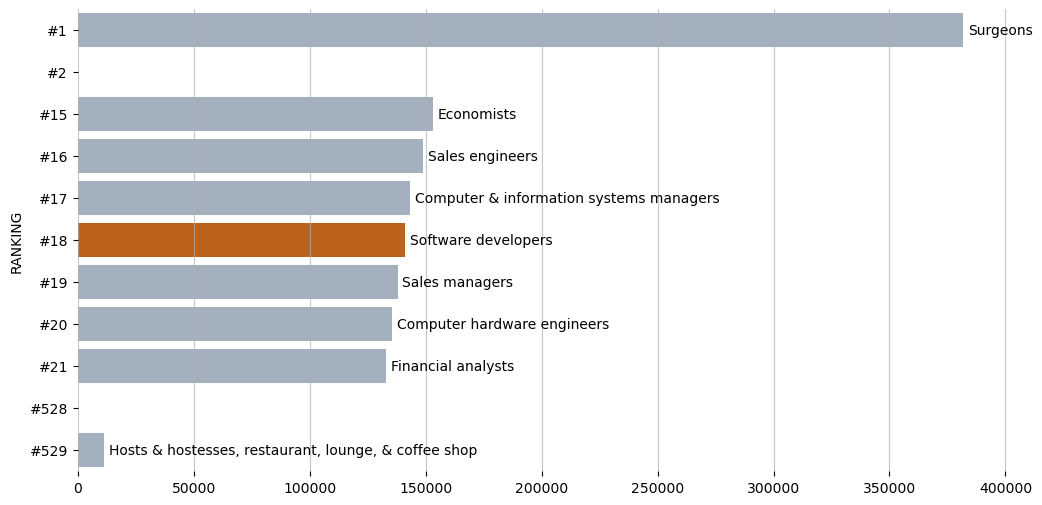

In [6]:
# Filter the data for the top and bottom ranked occupations
top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])]
top_bottom_df['Highlight'] = top_bottom_df['Detailed Occupation'] == "Software developers"

# Convert numeric rank to strings like "#1", "#2", etc.
top_bottom_df['Ranking_str'] = '#' + top_bottom_df['Ranking'].astype(str)

colors = ['#d55e00' if h else '#9eb0c3' for h in top_bottom_df['Highlight']] #sd is highlighted

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_bottom_df,
    x='Average Wage',
    y='Ranking_str',  
    palette=colors,
)

plt.xlabel("")
plt.ylabel("RANKING")

# List of occupations we want to skip labeling
exclude_labels = ["Physicians", "Ushers, lobby attendants, & ticket takers"]

for patch, occupation in zip(ax.patches, top_bottom_df['Detailed Occupation']):
    if occupation in exclude_labels:
        continue
    bar_width = patch.get_width()
    bar_y = patch.get_y()
    bar_height = patch.get_height()
    
    y_center = bar_y + bar_height / 2
    
    ax.text(bar_width + 2000, y_center, occupation, va='center', ha='left')

sns.despine(left=True, bottom=True)

plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


What attributes I could not cover here? 

    - Surgeons is not on the bar in my figure however it is on the bar in the original figure. I was having a hard time just moving that outside. 
    - The orange color for software developer bar is not exactly the same. 


## Part 2: Remixing Figure 
- Comparison of SDEs in comparison to other roles. 
- In 2022, Software developers earned an average of $141,138, $76,455 more than the average national salary of $64,683

HOW? 

In the updated version, I wanted to make the comparison of occupations a bit more intuitive and help people see the bigger picture. Instead of just listing jobs by their rank, I decided to show the percentage difference between each occupation’s wage and the overall median wage. This way, it is easier for viewers to spot which roles are doing better or worse than average. I also grouped similar jobs by industry, and gave each industry a consistent color, so that people can instantly compare how, for example, tech jobs stack up against finance jobs or healthcare jobs. This approach helps viewers see not just the wages themselves but how they relate to each other and gives a clearer sense of wage patterns across different types of jobs.


/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_19230/510719327.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


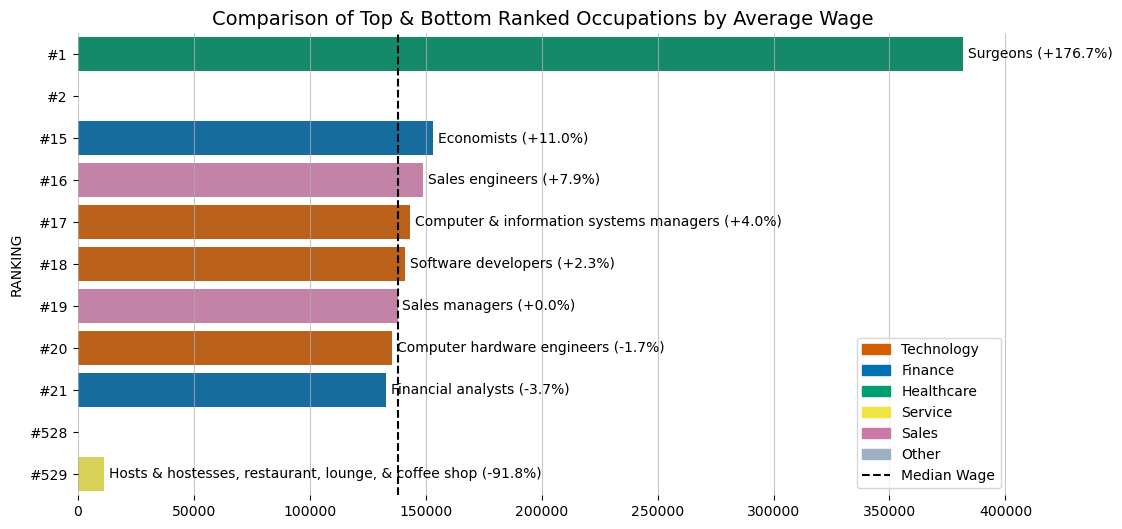

In [7]:
df.columns = df.columns.str.replace(' ', '_')

top_bottom_df = df[df['Ranking'].isin([1, 2, 15, 16, 17, 18, 19, 20, 21, 528, 529])].copy()

industry_mapping = {
    "Surgeons": "Healthcare",
    "Physicians": "Healthcare",
    "Economists": "Finance",
    "Sales engineers": "Sales",
    "Computer & information systems managers": "Technology",
    "Software developers": "Technology",
    "Sales managers": "Sales",
    "Computer hardware engineers": "Technology",
    "Financial analysts": "Finance",
    "Ushers, lobby attendants, & ticket takers": "Service",
    "Hosts & hostesses, restaurant, lounge, & coffee shop": "Service"
}

top_bottom_df['Industry'] = top_bottom_df['Detailed_Occupation'].map(industry_mapping).fillna("Other")

# Convert numeric rank to strings like "#1", "#2", etc.
top_bottom_df['Ranking_str'] = '#' + top_bottom_df['Ranking'].astype(str)

# Define industry colors
industry_colors = {
    "Technology": "#d55e00",  # reddish
    "Finance": "#0072B2",     # blue
    "Healthcare": "#009E73",  # green
    "Service": "#F0E442",     # yellow
    "Sales": "#CC79A7",       # pink
    "Other": "#9eb0c3"        # grey
}

# Create a list of colors for each row based on its industry
colors = top_bottom_df['Industry'].map(industry_colors).tolist()

# Create the figure and barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_bottom_df,
    x='Average_Wage',
    y='Ranking_str',  
    palette=colors
)

# Add title and labels
plt.title("Comparison of Top & Bottom Ranked Occupations by Average Wage", fontsize=14)
plt.xlabel("")
plt.ylabel("RANKING")

# Compute the median wage and add a vertical dashed line as a benchmark
median_wage = top_bottom_df['Average_Wage'].median()
ax.axvline(median_wage, color='black', linestyle='--', label='Median Wage')

# List of occupations to skip labeling
exclude_labels = ["Physicians", "Ushers, lobby attendants, & ticket takers"]

for patch, row in zip(ax.patches, top_bottom_df.itertuples()):
    pct_diff = ((row.Average_Wage - median_wage) / median_wage) * 100
    pct_text = f" ({pct_diff:+.1f}%)"
    
    if row.Detailed_Occupation in exclude_labels:
        continue  

    annotation = row.Detailed_Occupation + pct_text
    bar_width = patch.get_width()
    bar_y = patch.get_y()
    bar_height = patch.get_height()
    y_center = bar_y + bar_height / 2
    
    ax.text(bar_width + 2000, y_center, annotation, va='center', ha='left')

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='-', alpha=0.7)

# Create legend handles for each industry color
legend_handles = [mpatches.Patch(color=industry_colors[industry], label=industry) for industry in industry_colors]

# Create a legend handle for the median wage line
median_handle = Line2D([0], [0], color='black', linestyle='--', label='Median Wage')

# Combine both handles and add the combined legend to the bottom right of the plot
all_handles = legend_handles + [median_handle]
ax.legend(handles=all_handles, loc='lower right')

plt.show()


/var/folders/sh/cb18dbvn3v9b80sk1g_qrcrw0000gn/T/ipykernel_19230/1493420866.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


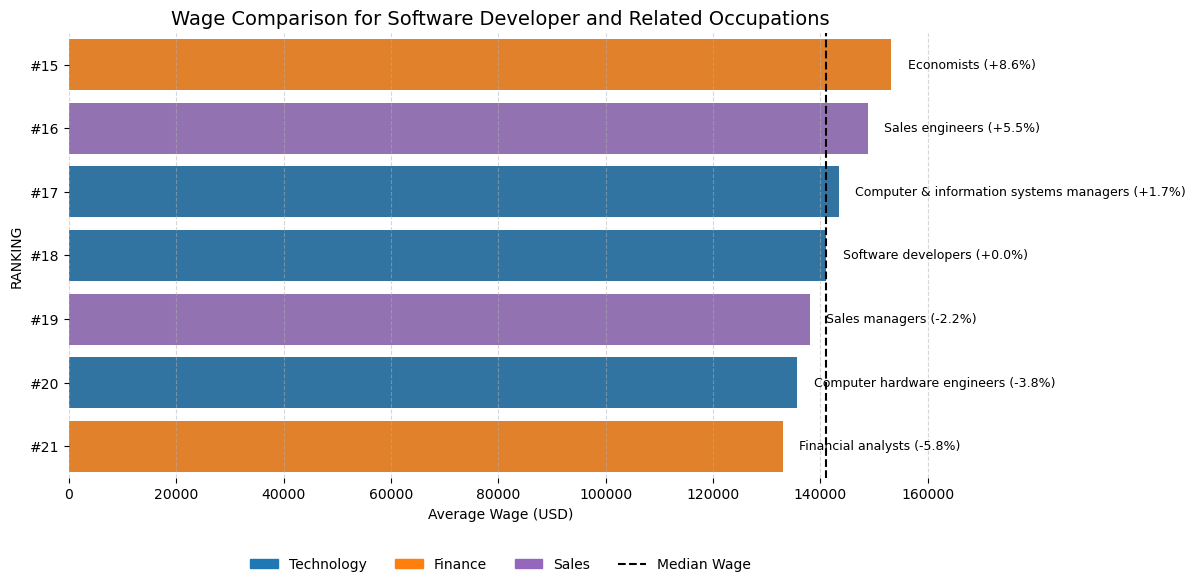

In [12]:
# Clean column names
df.columns = df.columns.str.replace(' ', '_')

# Focused occupations
selected_ranks = [15, 16, 17, 18, 19, 20, 21]
plot_df = df[df['Ranking'].isin(selected_ranks)].copy()

# Map industries
industry_mapping = {
    "Economists": "Finance",
    "Sales engineers": "Sales",
    "Computer & information systems managers": "Technology",
    "Software developers": "Technology",
    "Sales managers": "Sales",
    "Computer hardware engineers": "Technology",
    "Financial analysts": "Finance"
}
plot_df['Industry'] = plot_df['Detailed_Occupation'].map(industry_mapping)

# Assign ranking as string (e.g., "#15")
plot_df['Ranking_str'] = '#' + plot_df['Ranking'].astype(str)

# Define final industry color palette (no 'Other')
industry_colors = {
    "Technology": "#1f77b4",  # blue
    "Finance": "#ff7f0e",     # orange
    "Sales": "#9467bd"        # purple
}
colors = plot_df['Industry'].map(industry_colors).tolist()

# Sort by ranking
plot_df = plot_df.sort_values("Ranking")

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_df,
    x='Average_Wage',
    y='Ranking_str',
    palette=colors
)

# Titles and labels
plt.title("Wage Comparison for Software Developer and Related Occupations", fontsize=14)
plt.xlabel("Average Wage (USD)")
plt.ylabel("RANKING")

# Median wage line
median_wage = plot_df['Average_Wage'].median()
ax.axvline(median_wage, color='black', linestyle='--', label='Median Wage')

# Add text labels to right of bars
for patch, row in zip(ax.patches, plot_df.itertuples()):
    pct_diff = ((row.Average_Wage - median_wage) / median_wage) * 100
    annotation = f"{row.Detailed_Occupation} ({pct_diff:+.1f}%)"
    
    bar_width = patch.get_width()
    y_center = patch.get_y() + patch.get_height() / 2
    ax.text(bar_width + 3000, y_center, annotation, va='center', ha='left', fontsize=9)

# Grid and styling
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Create final legend (exclude 'Other')
legend_handles = [
    mpatches.Patch(color=industry_colors["Technology"], label="Technology"),
    mpatches.Patch(color=industry_colors["Finance"], label="Finance"),
    mpatches.Patch(color=industry_colors["Sales"], label="Sales"),
    Line2D([0], [0], color='black', linestyle='--', label='Median Wage')
]

# Add legend under plot
ax.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon=False)

plt.tight_layout()
plt.show()
